In [101]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from torchsummary import summary
import seaborn as sns

In [102]:
data = pd.read_csv(r"D:\repos\udemy\.dataset\mnist_train.csv", delimiter=',', header=None)

In [103]:
labels = data[0]
data = data.drop(columns=[0])

In [104]:
data = np.array(data)
labels = np.array(labels)

In [105]:
# The min and max values of the data are 0 and 255
# It is normalized to 0 and 1
data_norm = data/np.max(data)

## Tensor dataset and loader

In [106]:
data_tensor = torch.tensor(data_norm).float()
label_tensor = torch.tensor(labels).long()

In [107]:
data_tensor

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [108]:
label_tensor

tensor([5, 0, 4,  ..., 5, 6, 8])

In [109]:
x_train, x_test, y_train, y_test = train_test_split(data_tensor, label_tensor,train_size=0.7)

In [110]:
x_train.shape

torch.Size([42000, 784])

In [111]:
y_train.shape

torch.Size([42000])

In [112]:
train_data = TensorDataset(x_train, y_train)
test_data = TensorDataset(x_test, y_test)

In [113]:
train_data.tensors

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([9, 5, 8,  ..., 0, 4, 1]))

In [114]:
test_data.tensors

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([8, 0, 1,  ..., 5, 5, 9]))

In [115]:
train_loader = DataLoader(train_data, batch_size=64, drop_last=True, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [116]:
for i in test_loader:
    print(i[0].shape, i[1].shape)

torch.Size([18000, 784]) torch.Size([18000])


In [117]:
%whos

Variable           Type             Data/Info
---------------------------------------------
DataLoader         type             <class 'torch.utils.data.dataloader.DataLoader'>
F                  module           <module 'torch.nn.functio<...>orch\\nn\\functional.py'>
TensorDataset      type             <class 'torch.utils.data.dataset.TensorDataset'>
ax                 ndarray          3: 3 elems, type `object`, 24 bytes
create_model       function         <function create_model at 0x000001C9F4B479D0>
data               ndarray          60000x784: 47040000 elems, type `int64`, 376320000 bytes (358.88671875 Mb)
data_norm          ndarray          60000x784: 47040000 elems, type `float64`, 376320000 bytes (358.88671875 Mb)
data_tensor        Tensor           tensor([[0., 0., 0.,  ...<...>, 0.,  ..., 0., 0., 0.]])
epochs             int              60
fig                Figure           Figure(1600x400)
histx              ndarray          99: 99 elems, type `float64`, 792 bytes
histy   

## Model

In [118]:
def create_model():
    class ann(nn.Module):
        def __init__(self):
            super().__init__()
            
            self.input = nn.Linear(784, 32)
            self.hidden1 = nn.Linear(32, 32)
            self.hidden2 = nn.Linear(32, 32)
            self.output = nn.Linear(32, 10)

        def forward(self, x):
            x = F.relu(self.input(x))
            x = F.relu(self.hidden1(x))
            x = F.relu(self.hidden2(x))
            x = F.relu(self.output(x))
            return torch.log_softmax(x, axis=1)
        #  log-softmax the output, because I am using NLLLoss instead of CrossEntropy
    net = ann()
    lossfn = nn.NLLLoss()
    # NegativeLogLikelihood
    opt = torch.optim.Adam(net.parameters(), lr=0.01)

    return net, lossfn, opt

In [119]:
net, lossfn, opt = create_model()

In [120]:
net

ann(
  (input): Linear(in_features=784, out_features=32, bias=True)
  (hidden1): Linear(in_features=32, out_features=32, bias=True)
  (hidden2): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=10, bias=True)
)

# Deep dive into models

In [121]:
vars(net.input)

{'training': True,
 '_parameters': OrderedDict([('weight', Parameter containing:
               tensor([[ 0.0189, -0.0182,  0.0218,  ...,  0.0207, -0.0131, -0.0079],
                       [-0.0172,  0.0012,  0.0070,  ..., -0.0307, -0.0126,  0.0330],
                       [-0.0232,  0.0167, -0.0250,  ..., -0.0018,  0.0125,  0.0037],
                       ...,
                       [-0.0322, -0.0058,  0.0145,  ...,  0.0070, -0.0115,  0.0246],
                       [-0.0008, -0.0280, -0.0315,  ...,  0.0014, -0.0325,  0.0035],
                       [-0.0122, -0.0322,  0.0011,  ...,  0.0140,  0.0161, -0.0174]],
                      requires_grad=True)),
              ('bias',
               Parameter containing:
               tensor([-0.0297, -0.0314,  0.0300, -0.0199, -0.0189, -0.0281,  0.0247, -0.0182,
                        0.0356,  0.0249, -0.0184, -0.0292, -0.0199,  0.0034, -0.0007, -0.0256,
                       -0.0254, -0.0326,  0.0030, -0.0049, -0.0235, -0.0253,  0.0335, 

In [122]:
print(net.input.weight.size())
(net.input.weight)

torch.Size([32, 784])


Parameter containing:
tensor([[ 0.0189, -0.0182,  0.0218,  ...,  0.0207, -0.0131, -0.0079],
        [-0.0172,  0.0012,  0.0070,  ..., -0.0307, -0.0126,  0.0330],
        [-0.0232,  0.0167, -0.0250,  ..., -0.0018,  0.0125,  0.0037],
        ...,
        [-0.0322, -0.0058,  0.0145,  ...,  0.0070, -0.0115,  0.0246],
        [-0.0008, -0.0280, -0.0315,  ...,  0.0014, -0.0325,  0.0035],
        [-0.0122, -0.0322,  0.0011,  ...,  0.0140,  0.0161, -0.0174]],
       requires_grad=True)

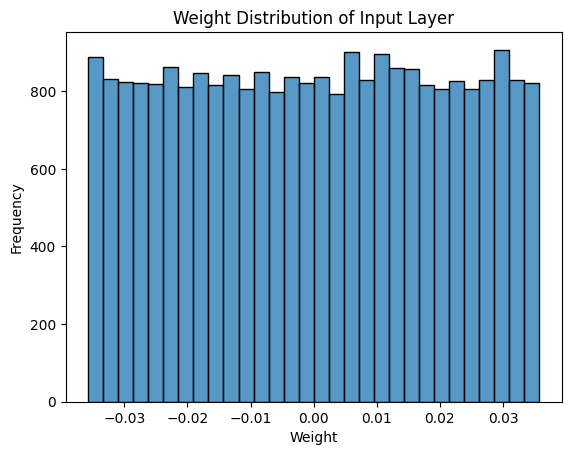

In [123]:
sns.histplot(net.input.weight.detach().numpy().flatten())
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Weight Distribution of Input Layer")
plt.show()

In [179]:
for i in net.parameters():
    print(i.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([32, 32])
torch.Size([32])
torch.Size([32, 32])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [180]:
def plot_histogram(net):
    w = np.array([])
    for layer in net.parameters():
        w = np.concatenate((w, layer.detach().flatten().numpy()))
    
    histy, histx = np.histogram(w, bins=np.linspace(-0.8, 0.8, 101), density=True)
    histx = (histx[1:]+histx[:-1])/2

    return histx, histy

In [181]:
histx, histy = plot_histogram(net)

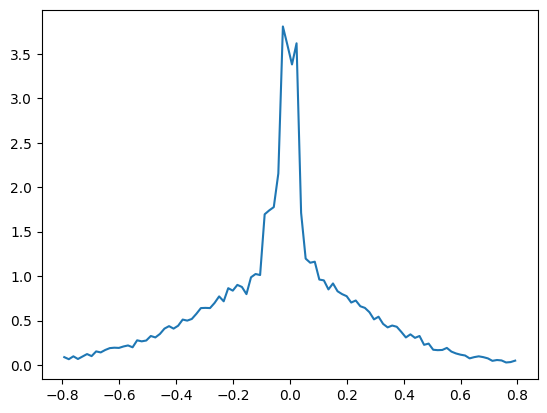

In [177]:
plt.plot(histx, histy)

In [178]:
summary(net, (10,784))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 10, 32]              25,120
├─Linear: 1-2                            [-1, 10, 32]              1,056
├─Linear: 1-3                            [-1, 10, 32]              1,056
├─Linear: 1-4                            [-1, 10, 10]              330
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
Total mult-adds (M): 0.03
Input size (MB): 0.03
Forward/backward pass size (MB): 0.01
Params size (MB): 0.11
Estimated Total Size (MB): 0.14


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 10, 32]              25,120
├─Linear: 1-2                            [-1, 10, 32]              1,056
├─Linear: 1-3                            [-1, 10, 32]              1,056
├─Linear: 1-4                            [-1, 10, 10]              330
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
Total mult-adds (M): 0.03
Input size (MB): 0.03
Forward/backward pass size (MB): 0.01
Params size (MB): 0.11
Estimated Total Size (MB): 0.14

In [193]:

def train():
    epochs = 50
    net, lossfn, opt = create_model()

    losses = []
    train_acc = []
    test_acc = []
    histx = np.zeros((epochs, 100))
    histy = np.zeros((epochs, 100))

    for i in range(epochs):
        histx, histy[i,:] = plot_histogram(net)
        # training
        batchacc = []
        batchloss = []
    
        for trainx, trainy in train_loader:
            # batch train
            yhat = net(trainx)
            loss = lossfn(yhat, trainy)

            opt.zero_grad()
            loss.backward()
            opt.step()

            batchloss.append(loss.item())
            matches = torch.argmax(yhat, axis=1) == trainy # Booleans
            matches_num = matches.float() # convert booleans to numbers
            accuracy = 100 * torch.mean(matches_num)
            batchacc.append(accuracy)
        train_acc.append(np.mean(batchacc))
        losses.append(np.mean(batchloss))

        # testing
        testx, testy = next(iter(test_loader))
        yhat = net(testx)

        test_acc.append(100*torch.mean((torch.argmax(yhat, axis=1)==testy).float()))
    return train_acc, test_acc, losses, histx, histy

In [194]:
train_acc, test_acc, losses, histx, histy = train()

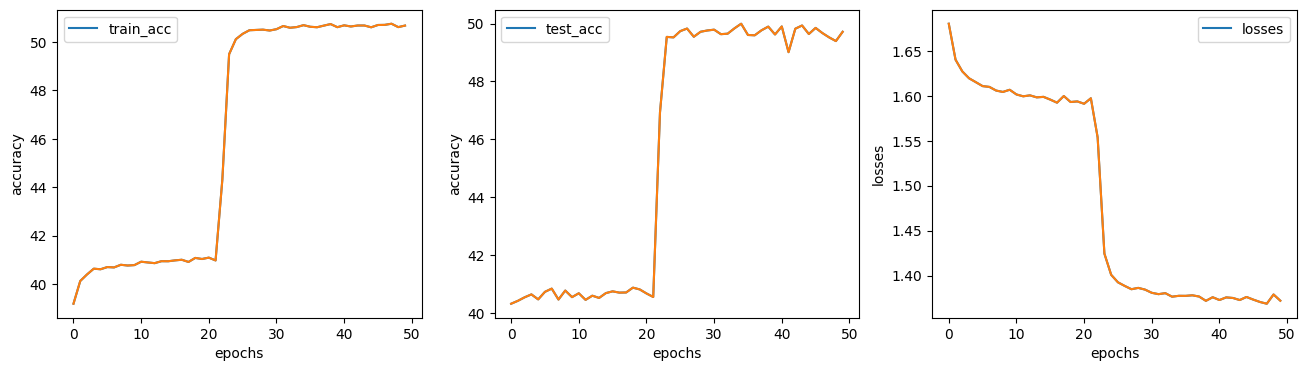

In [197]:
fig, ax = plt.subplots(1, 3, figsize=(16,4))
ax[0].plot(range(50), train_acc)
ax[0].plot(range(50), train_acc)
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')
ax[0].legend(['train_acc'])

ax[1].plot(range(50), test_acc)
ax[1].plot(range(50), test_acc)
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].legend(['test_acc'])


ax[2].plot(range(50), losses)
ax[2].plot(range(50), losses)
ax[2].set_xlabel('epochs')
ax[2].set_ylabel('losses')
ax[2].legend(['losses'])

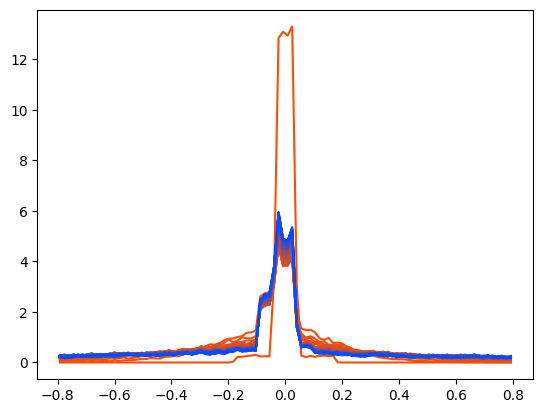

In [198]:
for i in range(50):
    plt.plot(histx, histy[i,:], color=[1-i/50, 0.3, i/50])